# Estimate the average roughness of the FOXSI mirrors by using the Effective Area we measured in Marshall.

### October 2018,
### Milo BC @ UC Berkeley

**Geometry of the FOXSI mirrors in cm according to info from Brian Ramsey:**

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('white')
sns.set_context('talk')

In [2]:
dist = 10400.0 ## source distance (104m) in cm.
## 7-Shell:
#Rout   = np.array([ 5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94 ])
#Rinter = np.array([ 5.15, 4.9, 4.66, 4.43, 4.21, 4.0, 3.8 ])
#Rinner = np.array([ 4.56, 4.335, 4.125, 3.92, 3.725, 3.54, 3.36 ])
## 10-Shell:
Rout   = np.array([ 5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94, 3.725, 3.51, 3.29 ])
Rinter = np.array([ 5.15, 4.9, 4.66, 4.43, 4.21, 4.0, 3.8, 3.59, 3.38, 3.17 ])
Rinner = np.array([ 4.56, 4.335, 4.125, 3.92, 3.725, 3.54, 3.36, 3.18, 2.995, 2.805 ])

In [3]:
## Geometric open area at entrance:
A = np.pi * (Rout**2 - Rinter**2)
A

array([6.42934791, 5.80322849, 5.22014889, 4.67822416, 4.17556934,
       3.84059702, 3.4042298 , 3.10240129, 2.81392454, 2.43536263])

Let's now calculate the difference angle between an at infinity source and one at 104 meters away from the optics pupil.

In [4]:
θ = np.rad2deg(np.arctan((Rout+Rinter)*.5/dist))  ## in degrees
θ*60 ## in arcmin

array([1.73457449, 1.6502836 , 1.56929824, 1.4916184 , 1.41724408,
       1.34700167, 1.2792384 , 1.20899599, 1.13875358, 1.06768478])

In [5]:
x = 30.0 * np.tan(np.deg2rad(θ))
x

array([0.01513702, 0.01440144, 0.01369471, 0.01301683, 0.01236779,
       0.01175481, 0.01116346, 0.01055048, 0.0099375 , 0.00931731])

In [6]:
for i in range(len(Rout)-1):
    print(i,Rinter[i]-Rout[i+1])

0 0.06500000000000039
1 0.06500000000000039
2 0.06500000000000039
3 0.0649999999999995
4 0.05999999999999961
5 0.06000000000000005
6 0.07499999999999973
7 0.08000000000000007
8 0.08999999999999986


Since these values are lower than *x*, this guarantees that the pupil of the immediately smaller shell does not block rays entering the front aperture.

#### Incoming Averaged Angle:

In [7]:
α = np.rad2deg(np.arctan((Rout-Rinter)/30.))  ## in degrees
α*60 ## in arcmin

array([22.34503932, 21.1991697 , 20.05329538, 18.90741659, 17.76153361,
       17.18859062, 16.04270181, 15.46975605, 14.89680943, 13.75091375])

Incident Angle with correction for finite source:

In [8]:
(α+θ)*60  ## in arcmin

array([24.07961381, 22.8494533 , 21.62259361, 20.39903499, 19.17877769,
       18.53559229, 17.32194021, 16.67875204, 16.03556301, 14.81859853])

Correction by the missing of some bounces on the second segment:

In [9]:
d = 60.*np.tan(np.deg2rad(θ))
d

array([0.03027404, 0.02880288, 0.02738942, 0.02603365, 0.02473558,
       0.02350962, 0.02232692, 0.02110096, 0.019875  , 0.01863462])

### Corrected Area

In [10]:
30.0/np.cos(np.deg2rad(α))

array([30.00063374, 30.00057041, 30.00051041, 30.00045375, 30.00040041,
       30.000375  , 30.00032666, 30.00030375, 30.00028167, 30.00024   ])

In [11]:
# Spider factor
Spider = 0.85
#Spider = 0.9

## Corrected open area at entrance:
CA = Spider * np.pi * ((Rout-d)**2 - (Rinter-x)**2)
CA

array([5.01891444, 4.52906952, 4.07220036, 3.64693716, 3.25190094,
       2.99566474, 2.6513409 , 2.42043328, 2.19944024, 1.90106863])

# Reflectivities

In [12]:
np.deg2rad(α+θ)*1000. ## in milirad

array([7.00447573, 6.64663654, 6.28975752, 5.93383875, 5.57888029,
       5.39178524, 5.03874816, 4.8516523 , 4.6645562 , 4.31055558])

In [13]:
(α+θ)

array([0.4013269 , 0.38082422, 0.36037656, 0.33998392, 0.31964629,
       0.30892654, 0.288699  , 0.2779792 , 0.26725938, 0.24697664])

# Plotting Theoretical Effective Area:

#  NMSFC SLF measured data

In [43]:
Rlabels = ['Shell01','Shell02','Shell03','Shell04','Shell05','Shell06','Shell07','Shell08','Shell09','Shell10']
NMSFCData = np.loadtxt('X4-7S-MeasuredEffectiveArea_SDDatMarshall.csv',delimiter=',').T

<ErrorbarContainer object of 3 artists>

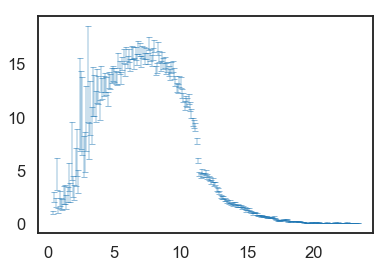

In [15]:
## Quicklook:
plt.errorbar(NMSFCData[0], NMSFCData[1], yerr=NMSFCData[2],
             fmt='none',elinewidth=.45,capsize=3,capthick=.5,label='Measured')

# NLBL All Roughness

In [16]:
data_dir = 'Roughness_LBL/'
str_indices = {'R07':'', 'R08':'', 'R09':'', 'R10':'', 'R11':'', 'R12':'', 'R13':'', 'R14':'', 'R15':''}
file_list, NLBLAreas = {}, {}

for key in str_indices:
    file_list.update({key: sorted(glob.glob(data_dir + '*' + key + '*.dat'))})
    
NLBLdata = {}
for key in sorted(str_indices):
    aux = {}
    for i,f in enumerate(file_list[key]):
        aux.update({i+1: np.array([np.loadtxt(f).T[0],np.loadtxt(f).T[1]* CA[i]]) })
        NLBLdata.update({key: aux })

for key in str_indices:
    NLBLAreas.update({key:sum([NLBLdata[key][j][1] for j in range(1,8)])})


Text(0.5, 1.0, 'LBNL Data for 08$\\AA$ Roughness')

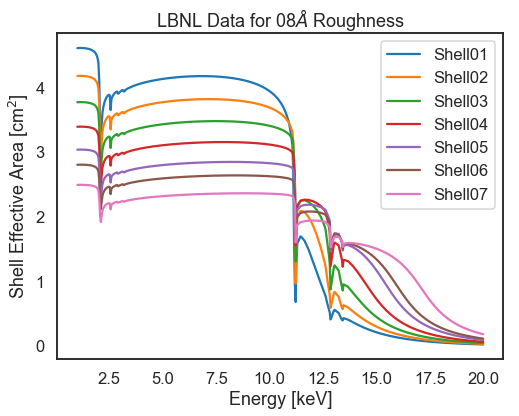

In [17]:
plt.figure(figsize=(8,6))
key = 'R08'
for j in range(1,8):
    plt.plot(NLBLdata[key][j][0]/1000.,NLBLdata[key][j][1],label=Rlabels[j-1])
plt.xlabel('Energy [keV]'); plt.ylabel('Shell Effective Area [cm$^2$]')
plt.legend()
plt.title('LBNL Data for '+key[1:]+'$\AA$ Roughness')

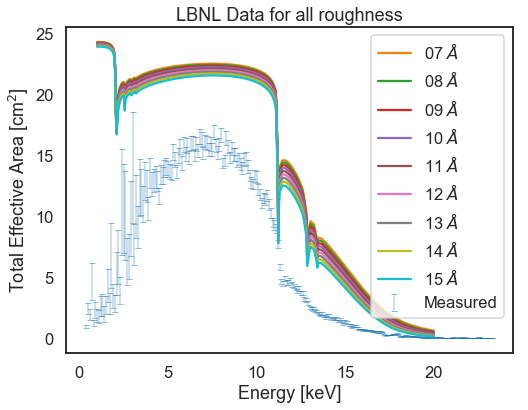

In [18]:
plt.figure(figsize=(8,6))
plt.errorbar(NMSFCData[0], NMSFCData[1], yerr=NMSFCData[2],
             fmt='none',elinewidth=.45,capsize=3,capthick=.5,label='Measured')
for key in sorted(str_indices):
    plt.plot(NLBLdata[key][1][0]/1000.,NLBLAreas[key],label=key[1:]+' $\AA$')
plt.xlabel('Energy [keV]'); plt.ylabel('Total Effective Area [cm$^2$]')
plt.title('LBNL Data for all roughness')
plt.legend()

# Windt All roughness

In [19]:
data_dir = 'Roughness_Windt/'
str_indices = {'R07':'', 'R08':'', 'R09':'', 'R10':'', 'R11':'', 'R12':'', 'R13':'', 'R14':'', 'R15':''}
file_list, WindtAreas = {}, {}

for key in str_indices:
    file_list.update({key: sorted(glob.glob(data_dir + '*' + key + '*.dat'))})
    
Windtdata = {}
for key in sorted(str_indices):
    aux = {}
    for i,f in enumerate(file_list[key]):
        aux.update({i+1: np.array([np.loadtxt(f).T[0],np.loadtxt(f).T[1]* CA[i]]) })
        Windtdata.update({key: aux })
        
for key in str_indices:
    WindtAreas.update({key:sum([Windtdata[key][j][1] for j in range(1,8)])})

Text(0.5, 1.0, 'Windt Data for 08$\\AA$ Roughness')

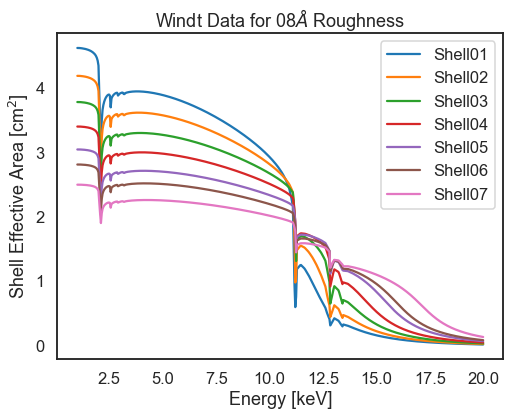

In [20]:
plt.figure(figsize=(8,6))
key = 'R08'
for j in range(1,8):
    plt.plot(Windtdata[key][j][0]/1000.,Windtdata[key][j][1],label=Rlabels[j-1])
plt.xlabel('Energy [keV]'); plt.ylabel('Shell Effective Area [cm$^2$]')
plt.legend()
plt.title('Windt Data for '+key[1:]+'$\AA$ Roughness')

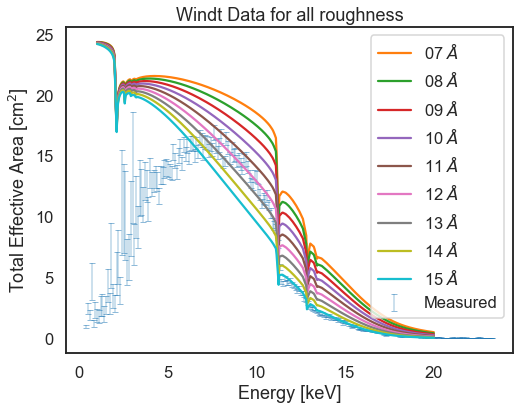

In [21]:
plt.figure(figsize=(8,6))
plt.errorbar(NMSFCData[0], NMSFCData[1], yerr=NMSFCData[2],
             fmt='none',elinewidth=.45,capsize=3,capthick=.5,label='Measured')
for key in sorted(str_indices):
    plt.plot(Windtdata[key][1][0]/1000.,WindtAreas[key],label=key[1:]+' $\AA$')
plt.xlabel('Energy [keV]'); plt.ylabel('Total Effective Area [cm$^2$]')
plt.title('Windt Data for all roughness')
plt.legend()

# EPDL97 All roughness

In [22]:
data_dir = 'Roughness_Windt/'
str_indices = {'R07':'', 'R08':'', 'R09':'', 'R10':'', 'R11':'', 'R12':'', 'R13':'', 'R14':'', 'R15':''}
file_list, WindtAreas = {}, {}

for key in str_indices:
    file_list.update({key: sorted(glob.glob(data_dir + '*' + key + '*.dat'))})
    
Windtdata = {}
for key in sorted(str_indices):
    aux = {}
    for i,f in enumerate(file_list[key]):
        aux.update({i+1: np.array([np.loadtxt(f).T[0],np.loadtxt(f).T[1]* CA[i]]) })
        Windtdata.update({key: aux })
        
for key in str_indices:
    WindtAreas.update({key:sum([Windtdata[key][j][1] for j in range(1,8)])})

In [23]:
data_dir = 'Roughness_EPDL97/'
str_indices = {'R07':'', 'R08':'', 'R09':'', 'R10':'', 'R11':'', 'R12':'', 'R13':'', 'R14':'', 'R15':''}
file_list, EPDL97Areas = {}, {}

for key in str_indices:
    file_list.update({key: sorted(glob.glob(data_dir + '*' + key + '*.dat'))})
    
EPDL97data = {}
for key in sorted(str_indices):
    aux = {}
    for i,f in enumerate(file_list[key]):
        aux.update({i+1: np.array([np.loadtxt(f).T[0],np.loadtxt(f).T[1]* CA[i]]) })
        EPDL97data.update({key: aux })
        
for key in str_indices:
    EPDL97Areas.update({key:sum([EPDL97data[key][j][1] for j in range(1,7)])})

Text(0.5, 1.0, 'EPDL97 Data for 08$\\AA$ Roughness')

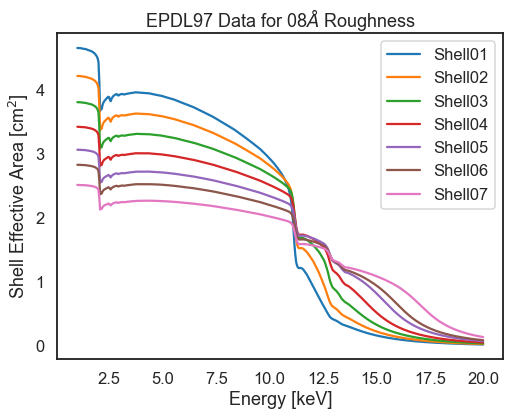

In [24]:
plt.figure(figsize=(8,6))
key = 'R08'
for j in range(1,8):
    plt.plot(EPDL97data[key][j][0]/1000.,EPDL97data[key][j][1],label=Rlabels[j-1])
plt.xlabel('Energy [keV]'); plt.ylabel('Shell Effective Area [cm$^2$]')
plt.legend()
plt.title('EPDL97 Data for '+key[1:]+'$\AA$ Roughness')

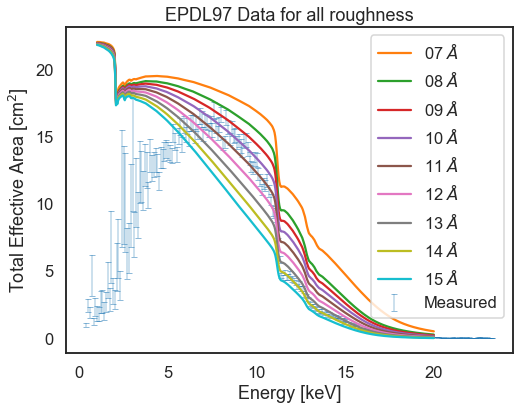

In [25]:
plt.figure(figsize=(8,6))
plt.errorbar(NMSFCData[0], NMSFCData[1], yerr=NMSFCData[2],
             fmt='none',elinewidth=.45,capsize=3,capthick=.5,label='Measured')
for key in sorted(str_indices):
    plt.plot(EPDL97data[key][1][0]/1000.,EPDL97Areas[key],label=key[1:]+' $\AA$')
plt.xlabel('Energy [keV]'); plt.ylabel('Total Effective Area [cm$^2$]')
plt.title('EPDL97 Data for all roughness')
plt.legend()

# Including the effect of the air absortion

In [26]:
air = np.loadtxt('5cm_air_absorption.txt').T
be = np.loadtxt('500micron_Be_absorption.txt').T

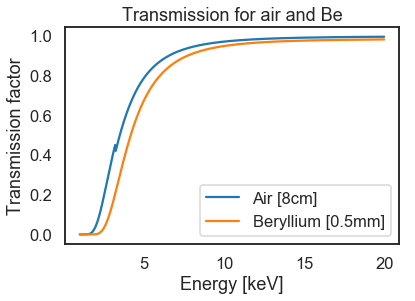

In [27]:
plt.plot(air[0]/1000.,air[1],label='Air [8cm]')
plt.plot(be[0]/1000.,be[1],label='Beryllium [0.5mm]')
plt.xlabel('Energy [keV]'); plt.ylabel('Transmission factor')
plt.title('Transmission for air and Be')
plt.legend()

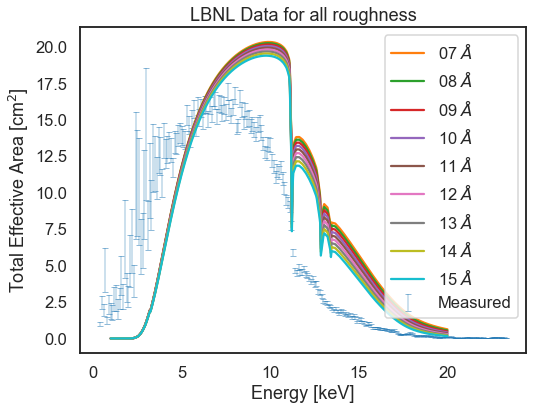

In [28]:
plt.figure(figsize=(8,6))
plt.errorbar(NMSFCData[0], NMSFCData[1], yerr=NMSFCData[2],
             fmt='none',elinewidth=.45,capsize=3,capthick=.5,label='Measured')
for key in sorted(str_indices):
    plt.plot(NLBLdata[key][1][0]/1000.,be[1]*air[1]*NLBLAreas[key],label=key[1:]+' $\AA$')
plt.xlabel('Energy [keV]'); plt.ylabel('Total Effective Area [cm$^2$]')
plt.title('LBNL Data for all roughness')
plt.legend()

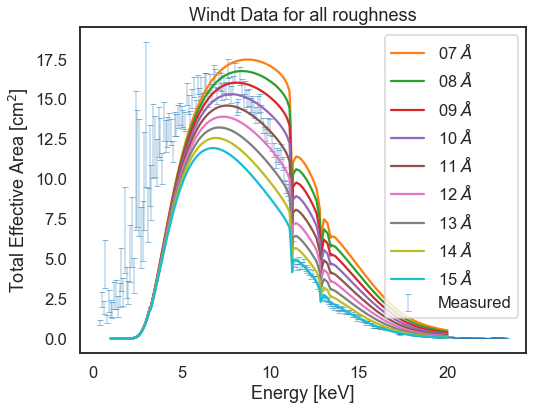

In [29]:
plt.figure(figsize=(8,6))
plt.errorbar(NMSFCData[0], NMSFCData[1], yerr=NMSFCData[2],
             fmt='none',elinewidth=.45,capsize=3,capthick=.5,label='Measured')
for key in sorted(str_indices):
    plt.plot(Windtdata[key][1][0]/1000.,be[1][:-1]*air[1][:-1]*WindtAreas[key],label=key[1:]+' $\AA$')
plt.xlabel('Energy [keV]'); plt.ylabel('Total Effective Area [cm$^2$]')
plt.title('Windt Data for all roughness')
plt.legend()

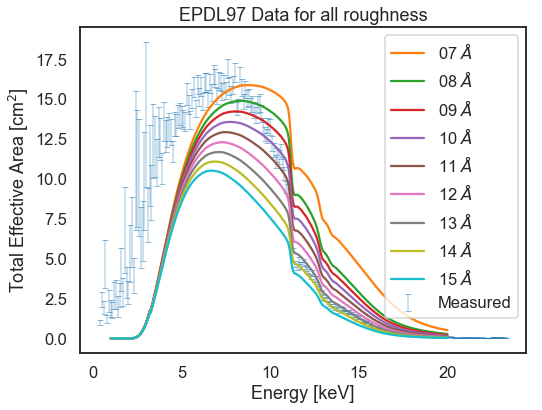

In [30]:
plt.figure(figsize=(8,6))
plt.errorbar(NMSFCData[0], NMSFCData[1], yerr=NMSFCData[2],
             fmt='none',elinewidth=.45,capsize=3,capthick=.5,label='Measured')
for key in sorted(str_indices):
    plt.plot(EPDL97data[key][1][0]/1000.,be[1][:-1]*air[1][:-1]*EPDL97Areas[key],label=key[1:]+' $\AA$')
plt.xlabel('Energy [keV]'); plt.ylabel('Total Effective Area [cm$^2$]')
plt.title('EPDL97 Data for all roughness')
plt.legend()

# Individual shells

## EPDL97 Model with Roughness = 0.9

Text(0.5, 1.0, 'EPDL97 Data for 09$\\AA$ Roughness')

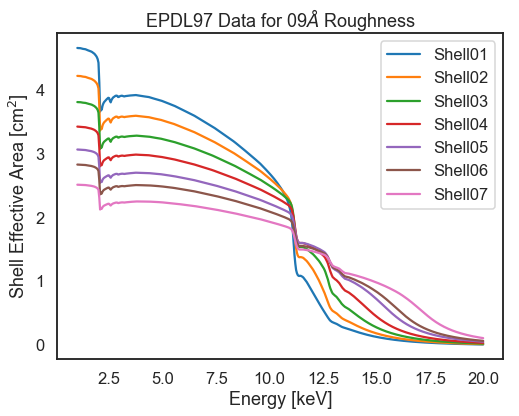

In [31]:
plt.figure(figsize=(8,6))
key = 'R09'
for j in range(1,8):
    plt.plot(EPDL97data[key][j][0]/1000.,EPDL97data[key][j][1],label=Rlabels[j-1])
plt.xlabel('Energy [keV]'); plt.ylabel('Shell Effective Area [cm$^2$]')
plt.legend()
plt.title('EPDL97 Data for '+key[1:]+'$\AA$ Roughness')

In [32]:
key = 'R09'
dictcsv = {'EPDL97 Energy [keV]': EPDL97data[key][1][0]/1000.,
           'S1 EPDL97 EA [cm^2]': EPDL97data[key][1][1],
           'S2 EPDL97 EA [cm^2]': EPDL97data[key][2][1],
           'S3 EPDL97 EA [cm^2]': EPDL97data[key][3][1],
           'S4 EPDL97 EA [cm^2]': EPDL97data[key][4][1],
           'S5 EPDL97 EA [cm^2]': EPDL97data[key][5][1],
           'S6 EPDL97 EA [cm^2]': EPDL97data[key][6][1],
           'S7 EPDL97 EA [cm^2]': EPDL97data[key][7][1],
          }
pd.DataFrame(dictcsv).to_csv("~/Desktop/EPDL97Data.csv")

## Windt Model with Roughness = 10

Text(0.5, 1.0, 'Windt Data for 10$\\AA$ Roughness')

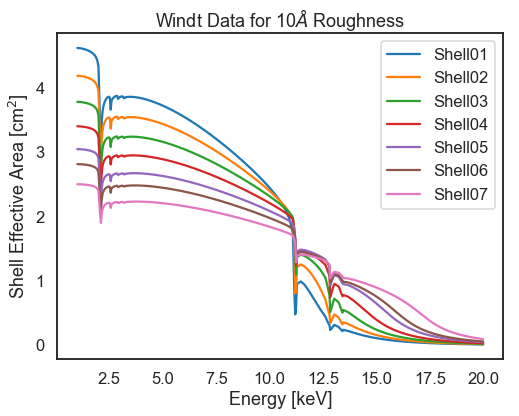

In [33]:
plt.figure(figsize=(8,6))
key = 'R10'
for j in range(1,8):
    plt.plot(Windtdata[key][j][0]/1000.,Windtdata[key][j][1],label=Rlabels[j-1])
plt.xlabel('Energy [keV]'); plt.ylabel('Shell Effective Area [cm$^2$]')
plt.legend()
plt.title('Windt Data for '+key[1:]+'$\AA$ Roughness')

In [34]:
key = 'R10'
dictcsv = {'Windt Energy [keV]': Windtdata[key][1][0]/1000.,
           'S1 Windt EA [cm^2]': Windtdata[key][1][1],
           'S2 Windt EA [cm^2]': Windtdata[key][2][1],
           'S3 Windt EA [cm^2]': Windtdata[key][3][1],
           'S4 Windt EA [cm^2]': Windtdata[key][4][1],
           'S5 Windt EA [cm^2]': Windtdata[key][5][1],
           'S6 Windt EA [cm^2]': Windtdata[key][6][1],
           'S7 Windt EA [cm^2]': Windtdata[key][7][1],
          }
pd.DataFrame(dictcsv).to_csv("~/Desktop/WindtData"+key+"A.csv")

## Lab Data to CSV:

Text(0.5, 1.0, 'Lab Effective Area for a 7-Shell FOXSI Module')

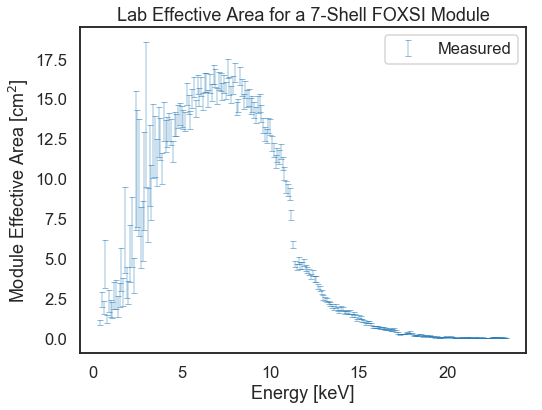

In [35]:
plt.figure(figsize=(8,6))
plt.errorbar(NMSFCData[0], NMSFCData[1], yerr=NMSFCData[2],
             fmt='none',elinewidth=.45,capsize=3,capthick=.5,label='Measured')
plt.xlabel('Energy [keV]'); plt.ylabel('Module Effective Area [cm$^2$]')
plt.legend()
plt.title('Lab Effective Area for a 7-Shell FOXSI Module')

In [36]:
dictcsv = {'Lab Energy [keV]': NMSFCData[0],
           'Lab EA [cm^2]': NMSFCData[1],
           'error [cm^2]': NMSFCData[2]
          }
pd.DataFrame(dictcsv).to_csv("~/Desktop/LabData7Shells.csv")

# Only Three most inner shells

## EPDL97 Model with Roughness = 9

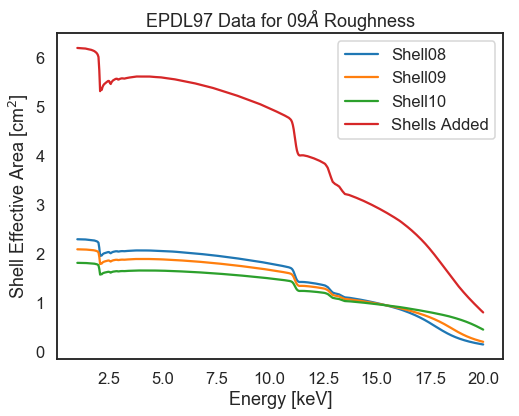

In [62]:
plt.figure(figsize=(8,6))
key = 'R09'
TotalEF = np.zeros_like(EPDL97data[key][1][1])
for j in range(8,11):
    plt.plot(EPDL97data[key][j][0]/1000.,EPDL97data[key][j][1],label=Rlabels[j-1])
    TotalEF+=EPDL97data[key][j][1]
plt.plot(EPDL97data[key][1][0]/1000.,TotalEF,label='Shells Added')
plt.xlabel('Energy [keV]'); plt.ylabel('Shell Effective Area [cm$^2$]')
plt.legend()
plt.title('EPDL97 Data for '+key[1:]+'$\AA$ Roughness')
plt.show()

In [64]:
key = 'R09'
dictcsv = {'EPDL97 Energy [keV]'  : EPDL97data[key][1][0]/1000.,
           'S08 EPDL97 EA [cm^2]' : EPDL97data[key][8][1],
           'S09 EPDL97 EA [cm^2]' : EPDL97data[key][9][1],
           'S10 EPDL97 EA [cm^2]' : EPDL97data[key][10][1],
           'S08+S09+S10 EA [cm^2]': TotalEF
          }
pd.DataFrame(dictcsv).to_csv("~/Desktop/3Inner_EA_EPDL97.csv")

## Windt Model with Roughness = 10

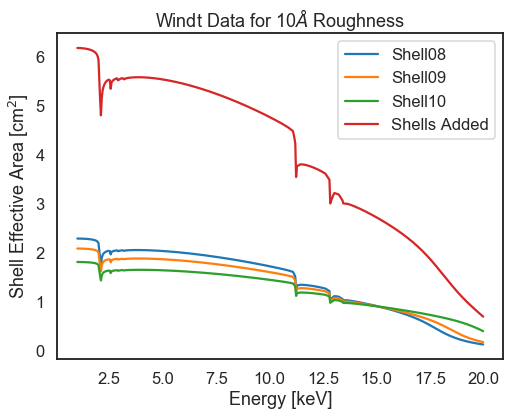

In [73]:
plt.figure(figsize=(8,6))
key = 'R10'
TotalEF = np.zeros_like(Windtdata[key][1][1])
for j in range(8,11):
    plt.plot(Windtdata[key][j][0]/1000.,Windtdata[key][j][1],label=Rlabels[j-1])
    TotalEF+=Windtdata[key][j][1]
plt.plot(Windtdata[key][1][0]/1000.,TotalEF,label='Shells Added')    
plt.xlabel('Energy [keV]'); plt.ylabel('Shell Effective Area [cm$^2$]')
plt.legend()
plt.title('Windt Data for '+key[1:]+'$\AA$ Roughness')
plt.show()

In [74]:
key = 'R10'
dictcsv = {'Windt Energy [keV]'  : Windtdata[key][1][0]/1000.,
           'S08 Windt EA [cm^2]' : Windtdata[key][8][1],
           'S09 Windt EA [cm^2]' : Windtdata[key][9][1],
           'S10 Windt EA [cm^2]' : Windtdata[key][10][1],
           'S08+S09+S10 EA [cm^2]': TotalEF
          }
pd.DataFrame(dictcsv).to_csv("~/Desktop/3Inner_EA_Windt.csv")